In [37]:
import curvature as c
import manifold as m

import imp
imp.reload(m)


<module 'manifold' from '/Users/sruthip/Documents/curvature/manifold.py'>

In [33]:
import matplotlib.pyplot as plt
%matplotlib notebook

X = m.Sphere().sample(10000, 2) # sample 1000 points from a 2-sphere

# plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 3)
plt.show

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(block=None)>

Example: Estimate scalar curvature at every point we sampled from sphere

In [34]:
import math
import pickle

sce = pickle.load( open( "sce0110.pickle", "rb" ) )

In [22]:
sss = [sce.estimate_all(rmax = 0.1*i) for i in range(15, 40, 5)]

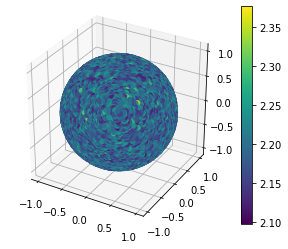

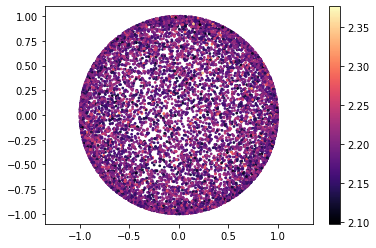

In [41]:
%matplotlib inline
Ss = sss[0]
m.plot_3d(X, Ss)

plt.scatter(X[:, 0], X[:, 1], s = 3, c = Ss, cmap = 'magma')
plt.axis('equal')
plt.colorbar()
plt.show()

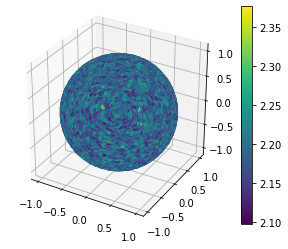

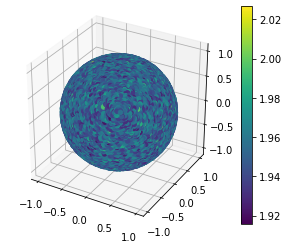

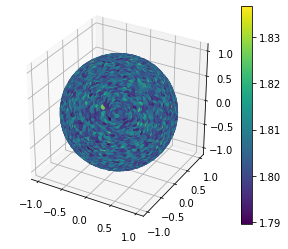

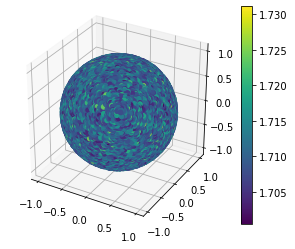

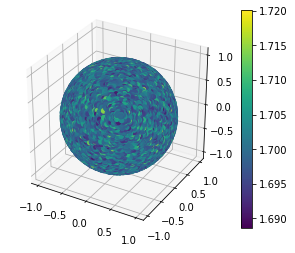

IndexError: list index out of range

In [28]:
%matplotlib inline
m.plot_3d(X, sss[0])

%matplotlib inline
m.plot_3d(X, sss[1])

%matplotlib inline
m.plot_3d(X, sss[2])

%matplotlib inline
m.plot_3d(X, sss[3])

%matplotlib inline
m.plot_3d(X, sss[4])

%matplotlib inline
m.plot_3d(X, sss[5])

Get a closer look at what's happening: calculate estimated ball ratios at the 0th point in X, and fit a quadratic curve

Estimated curvature using version 1:  2.1697207067368454


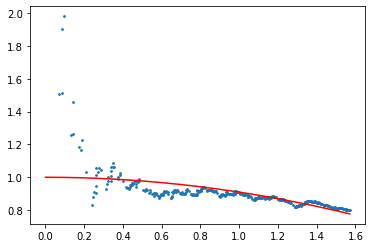

Estimated curvature using version 2:  2.267569314848978


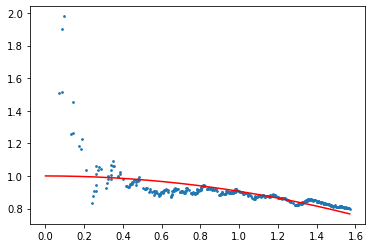

In [18]:
import numpy as np

rmax = math.pi/2
n = 2
rs, ball_ratios = sce.ball_ratios(0, rmax = rmax)
C1 = sce.fit_quad_coeff(0, rmax = rmax)
S1 = -6*(n + 2)*C1
print("Estimated curvature using version 1: ", S1)

# plot
xs = np.linspace(0, rmax, 200)
ys = [1 + C1*x**2 for x in xs]
plt.plot(xs, ys, color = 'r') # plot the quadratic curve 1 + C1*r**2 in red
plt.scatter(rs, ball_ratios, s = 3) # plot all the estimated ball ratios in blue
plt.show()

# Fit quadratic curve using version 2 (Eq 11 in overleaf, i.e., "refined version")
C2 = sce.fit_quad_coeff(0, rmax = math.pi/2, version = 2)
S2 = -6*(n + 2)*C2
print("Estimated curvature using version 2: ", S2)

ys = [1 + C2*x**2 for x in xs]
plt.plot(xs, ys, color = 'r') # plot the quadratic curve 1 + C2*r**2 in red
plt.scatter(rs, ball_ratios, s = 3) # plot all the estimated ball ratios in blue
plt.show()